<h1>Fine-tuning YOLOv8 Object Detection Model on a Custom Dataset</h1>
<hr/>

<h2>I. Introduction</h2>
<ul>
    <li>YOLOv8 is the latest installment in the highly influential family of models that use the YOLO (You Only Look Once) architecture. YOLOv8 was developed by Ultralytics, a team known for its work on YOLOv3 and YOLOv.</li>
    <li>Following the trend set by  YOLOv6 and YOLOv7, we have at our disposal object detection, but also instance segmentation, and image classification. The model itself is created in PyTorch and runs on both the CPU and GPU. As with YOLOv5, we also have a number of various exports such as TF.js or CoreML.</li>
</ul>

<h2>II. Model Description</h2>
<ul>
    <li>Base Model used: <a href="https://docs.ultralytics.com/tasks/detect/">YOLOv8m</a></li>
    <li>Dataset source: <a href="https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/2?ref=blog.roboflow.com">football-players-detection</a></li>
    <li>GPU cards which would work: H100, A100, V100(training will take 5-6 hours)</li>
</ul>

<h2>III. Usage Guide</h2>

<h3>1. Install required packages</h3>

In [ ]:
%pip install ultralytics

<h3>2. Import YOLO package</h3>

In [ ]:
from ultralytics import YOLO

<h3>3. Create a new dataset</h3> 

<p>There are two ways for using a custom dataset
<ul>
    <li>Label new images and create a custom dataset - <a href="https://roboflow.com/how-to-label/yolov8">How to label</a></li>
    <li>Use already labelled custom dataset - <a href="https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/2?ref=blog.roboflow.com">football-players-detection</a></li>
</ul>
</p>

<h3>4. Import the custom dataset</h3>

<p>Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process straightforward. Let me show you how!<p>
<ol>
    <li>Create a project- Before you start, you need to create a Roboflow account. Once you do that, you can create a new project in the Roboflow dashboard. Keep in mind to choose the right project type. In this case choose, "Object Detection".<br/>

![Create a project](./2.png)
    </li>
    <li><p>Upload your images- Next, add data to your newly created project. You can do it via API or through our web interface. If you don’t have a dataset, you can grab one from Roboflow Universe or use the football-players-detection dataset which we will be showing later in this tutorial.</p>
    <p>If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.<br/></p>
    ![Upload your images](./3.png)
    </li>
    <li><p>Label your images- If you only have images, you can label them in Roboflow Annotate. When starting from scratch, consider annotating large batches of images via API or use the model-assisted labeling tool to speed things up.<br/></p>
    ![Label your images](./4.png)
    </li>
    <li><p>Generate a new version of your dataset- Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is entirely optional, however, it can allow you to improve the robustness of your model significantly.<br/></p>
    ![Generate a new version of your dataset](./5.png)
    </li>
    <li><p>Export your dataset- Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training.</p>
    <p>One way to download a dataset from Roboflow Universe is to use our pip package. You can generate the appropriate code snippet directly in our UI. On a dataset’s Universe home page, click the Download this Dataset button and select YOLO v5 PyTorch export format.</p>
    <p>After a few seconds, you will see a code similar to the one below, except with all the necessary parameters filled in. You can copy and paste it into your Jupyter Notebook or a similar environment. When you execute it, the dataset will be downloaded to your machine in the appropriate format. Magic!.<br/></p>
    ![Export your dataset](./7.png)
    </li>
</ol>


In [ ]:
#The copied code will be of this format, paste it here ->
from roboflow import Roboflow

rf = Roboflow(api_key='YOUR_API_KEY')
project = rf.workspace('WORKSPACE').project('PROJECT')
dataset = project.version(1).download('yolov8')

<h3>5. Train YOLOv8 on a custom dataset</h3>

After pasting the dataset download snippet into your YOLOv8 notebook, you are ready to begin the training process. You can do so using this command:

In [ ]:
#Put the location of the your yaml file in place of Dataset.location
!yolo task=detect mode=train model=yolov8m.pt data={Dataset.location}/data.yaml epochs=50 imgsz=640

<h3>6. Validate with the new model</h3>

When the training is over, it is good practice to validate the new model on images it has not seen before. Therefore, when creating a dataset, we divide it into three parts, and one of them that we will use now as a test dataset

In [ ]:
#Put the location of the your yaml file in place of Dataset.location
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={Dataset.location}/data.yaml

<h3>7. Predict with the custom dataset</h3>

To predict data using a custom model, use the following command:

In [ ]:
#Put the location of the new model best.pt and the location of the source of files which you want to predict
!yolo task=detect mode=predict model={runs/detect/train/weights}/best.pt conf=0.25 source={dataset.location}/test/images

<h2>IV. Evaluation and Results</h2>
<ul><li><h3>Results of training a player detection model with YOLOv8 -</h3>
    <ol>
        <li><h4>The Confusion matrix returned after training</h4>

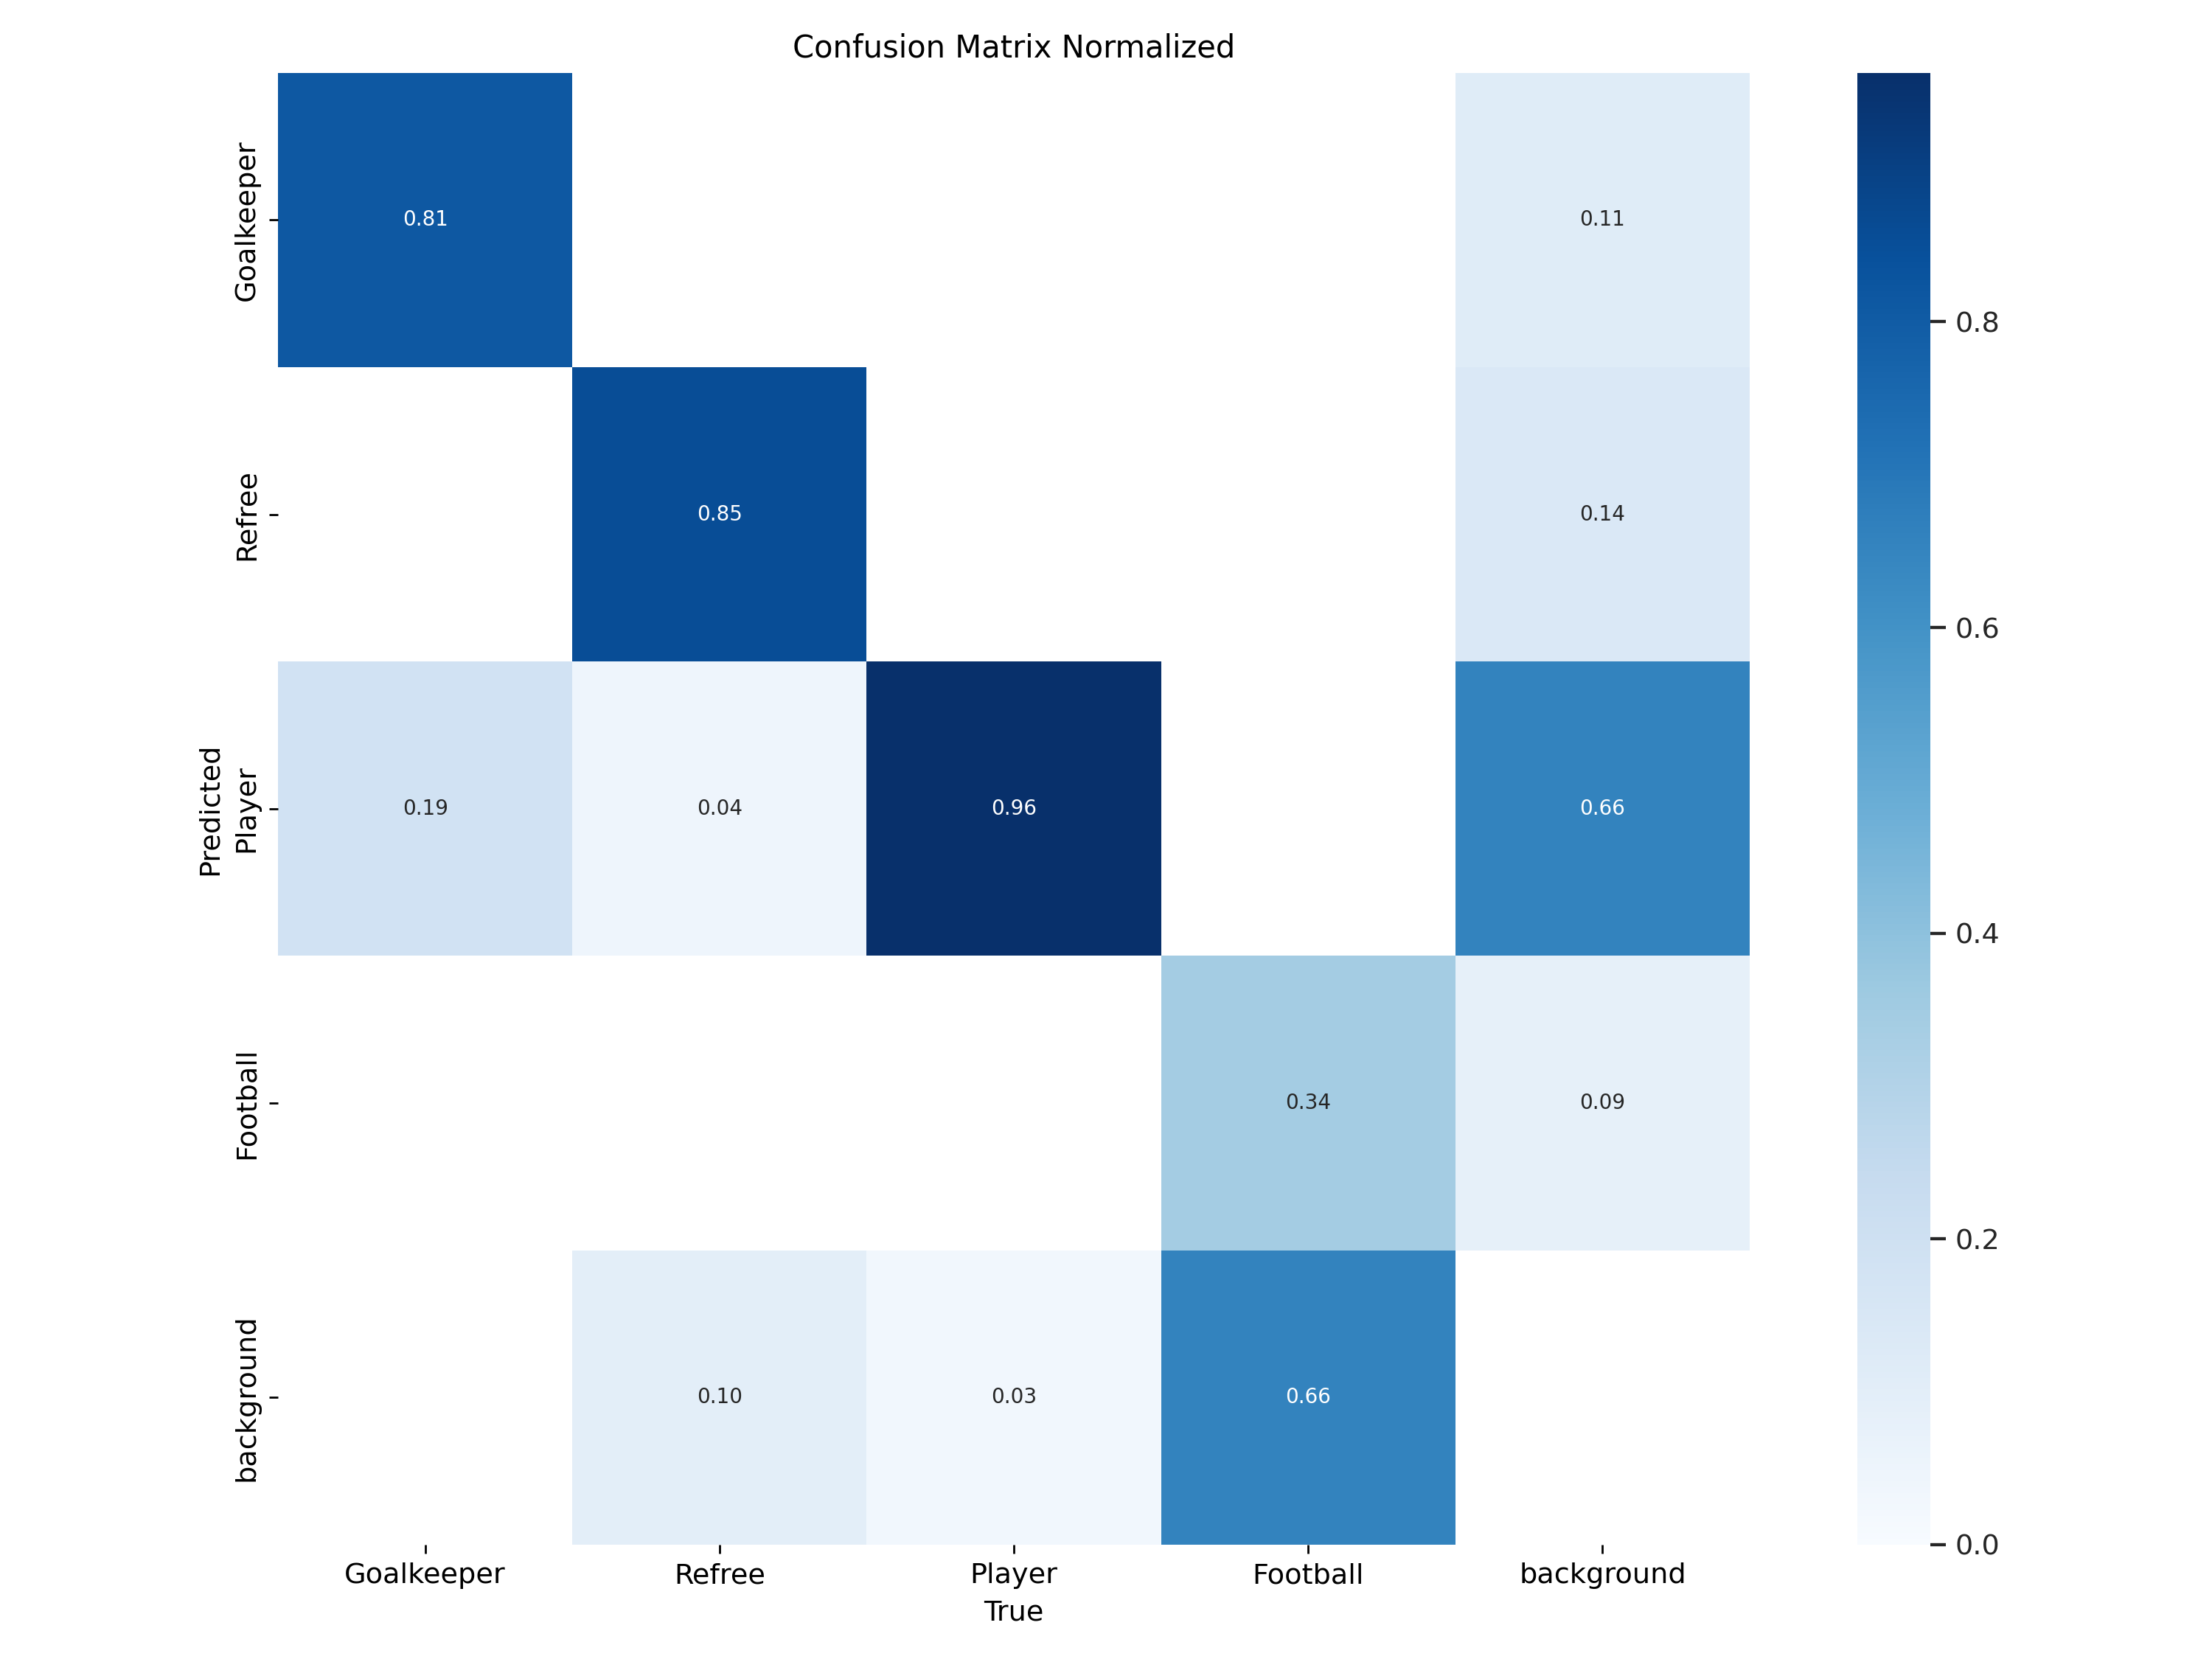</li>
        <li><h4>Key Metrics tracked by YOLOv8</h4>

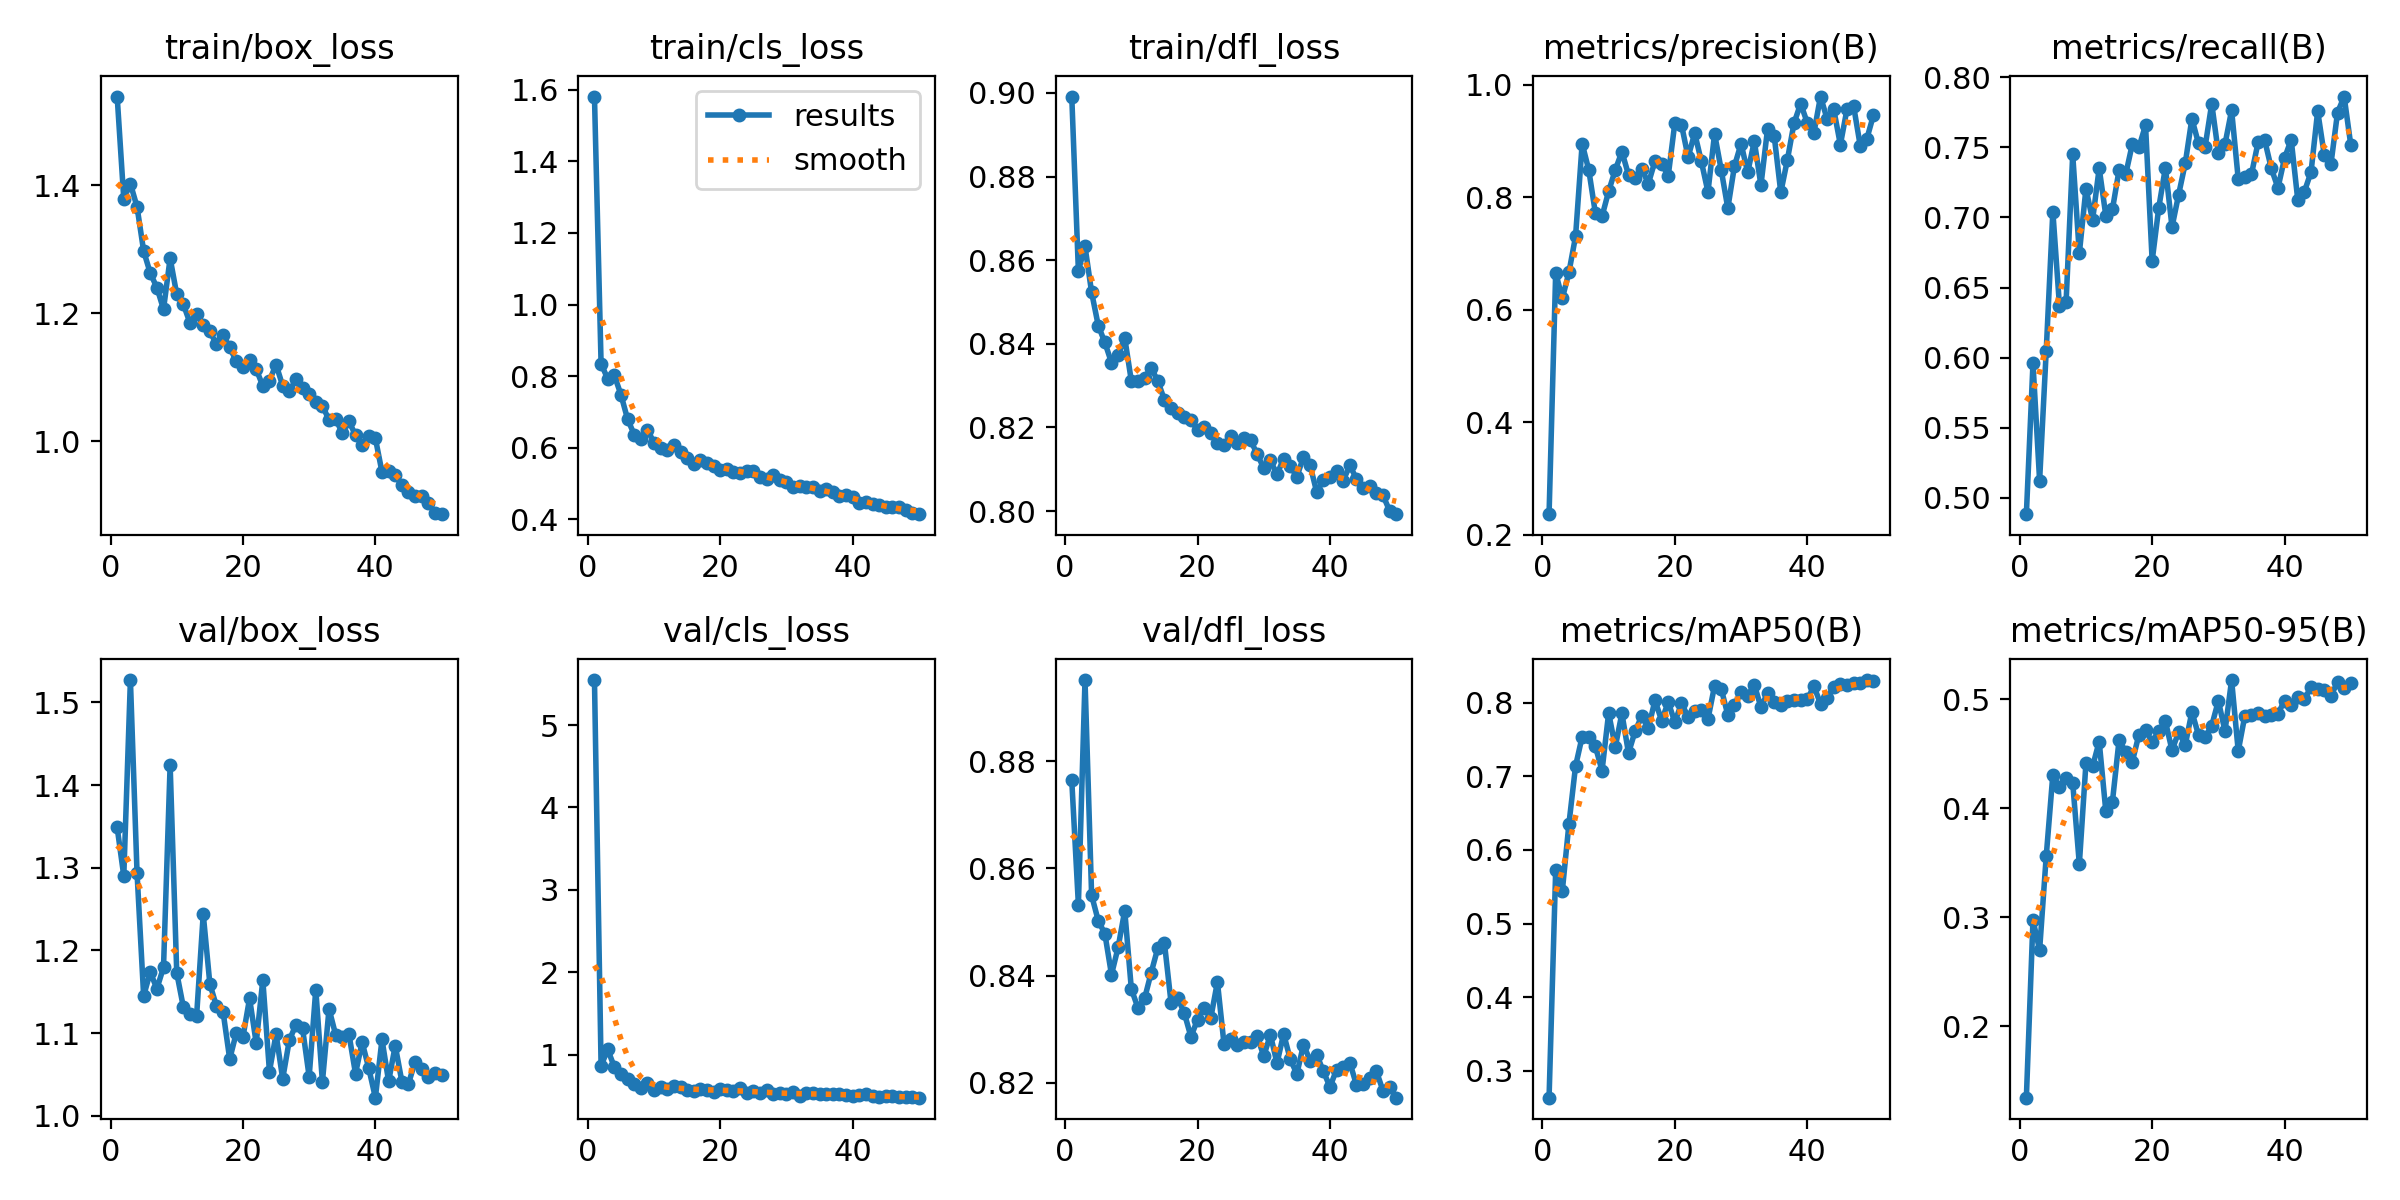</li>
        <li><h4>Example YOLOv8 inference on a validation batch</h4>

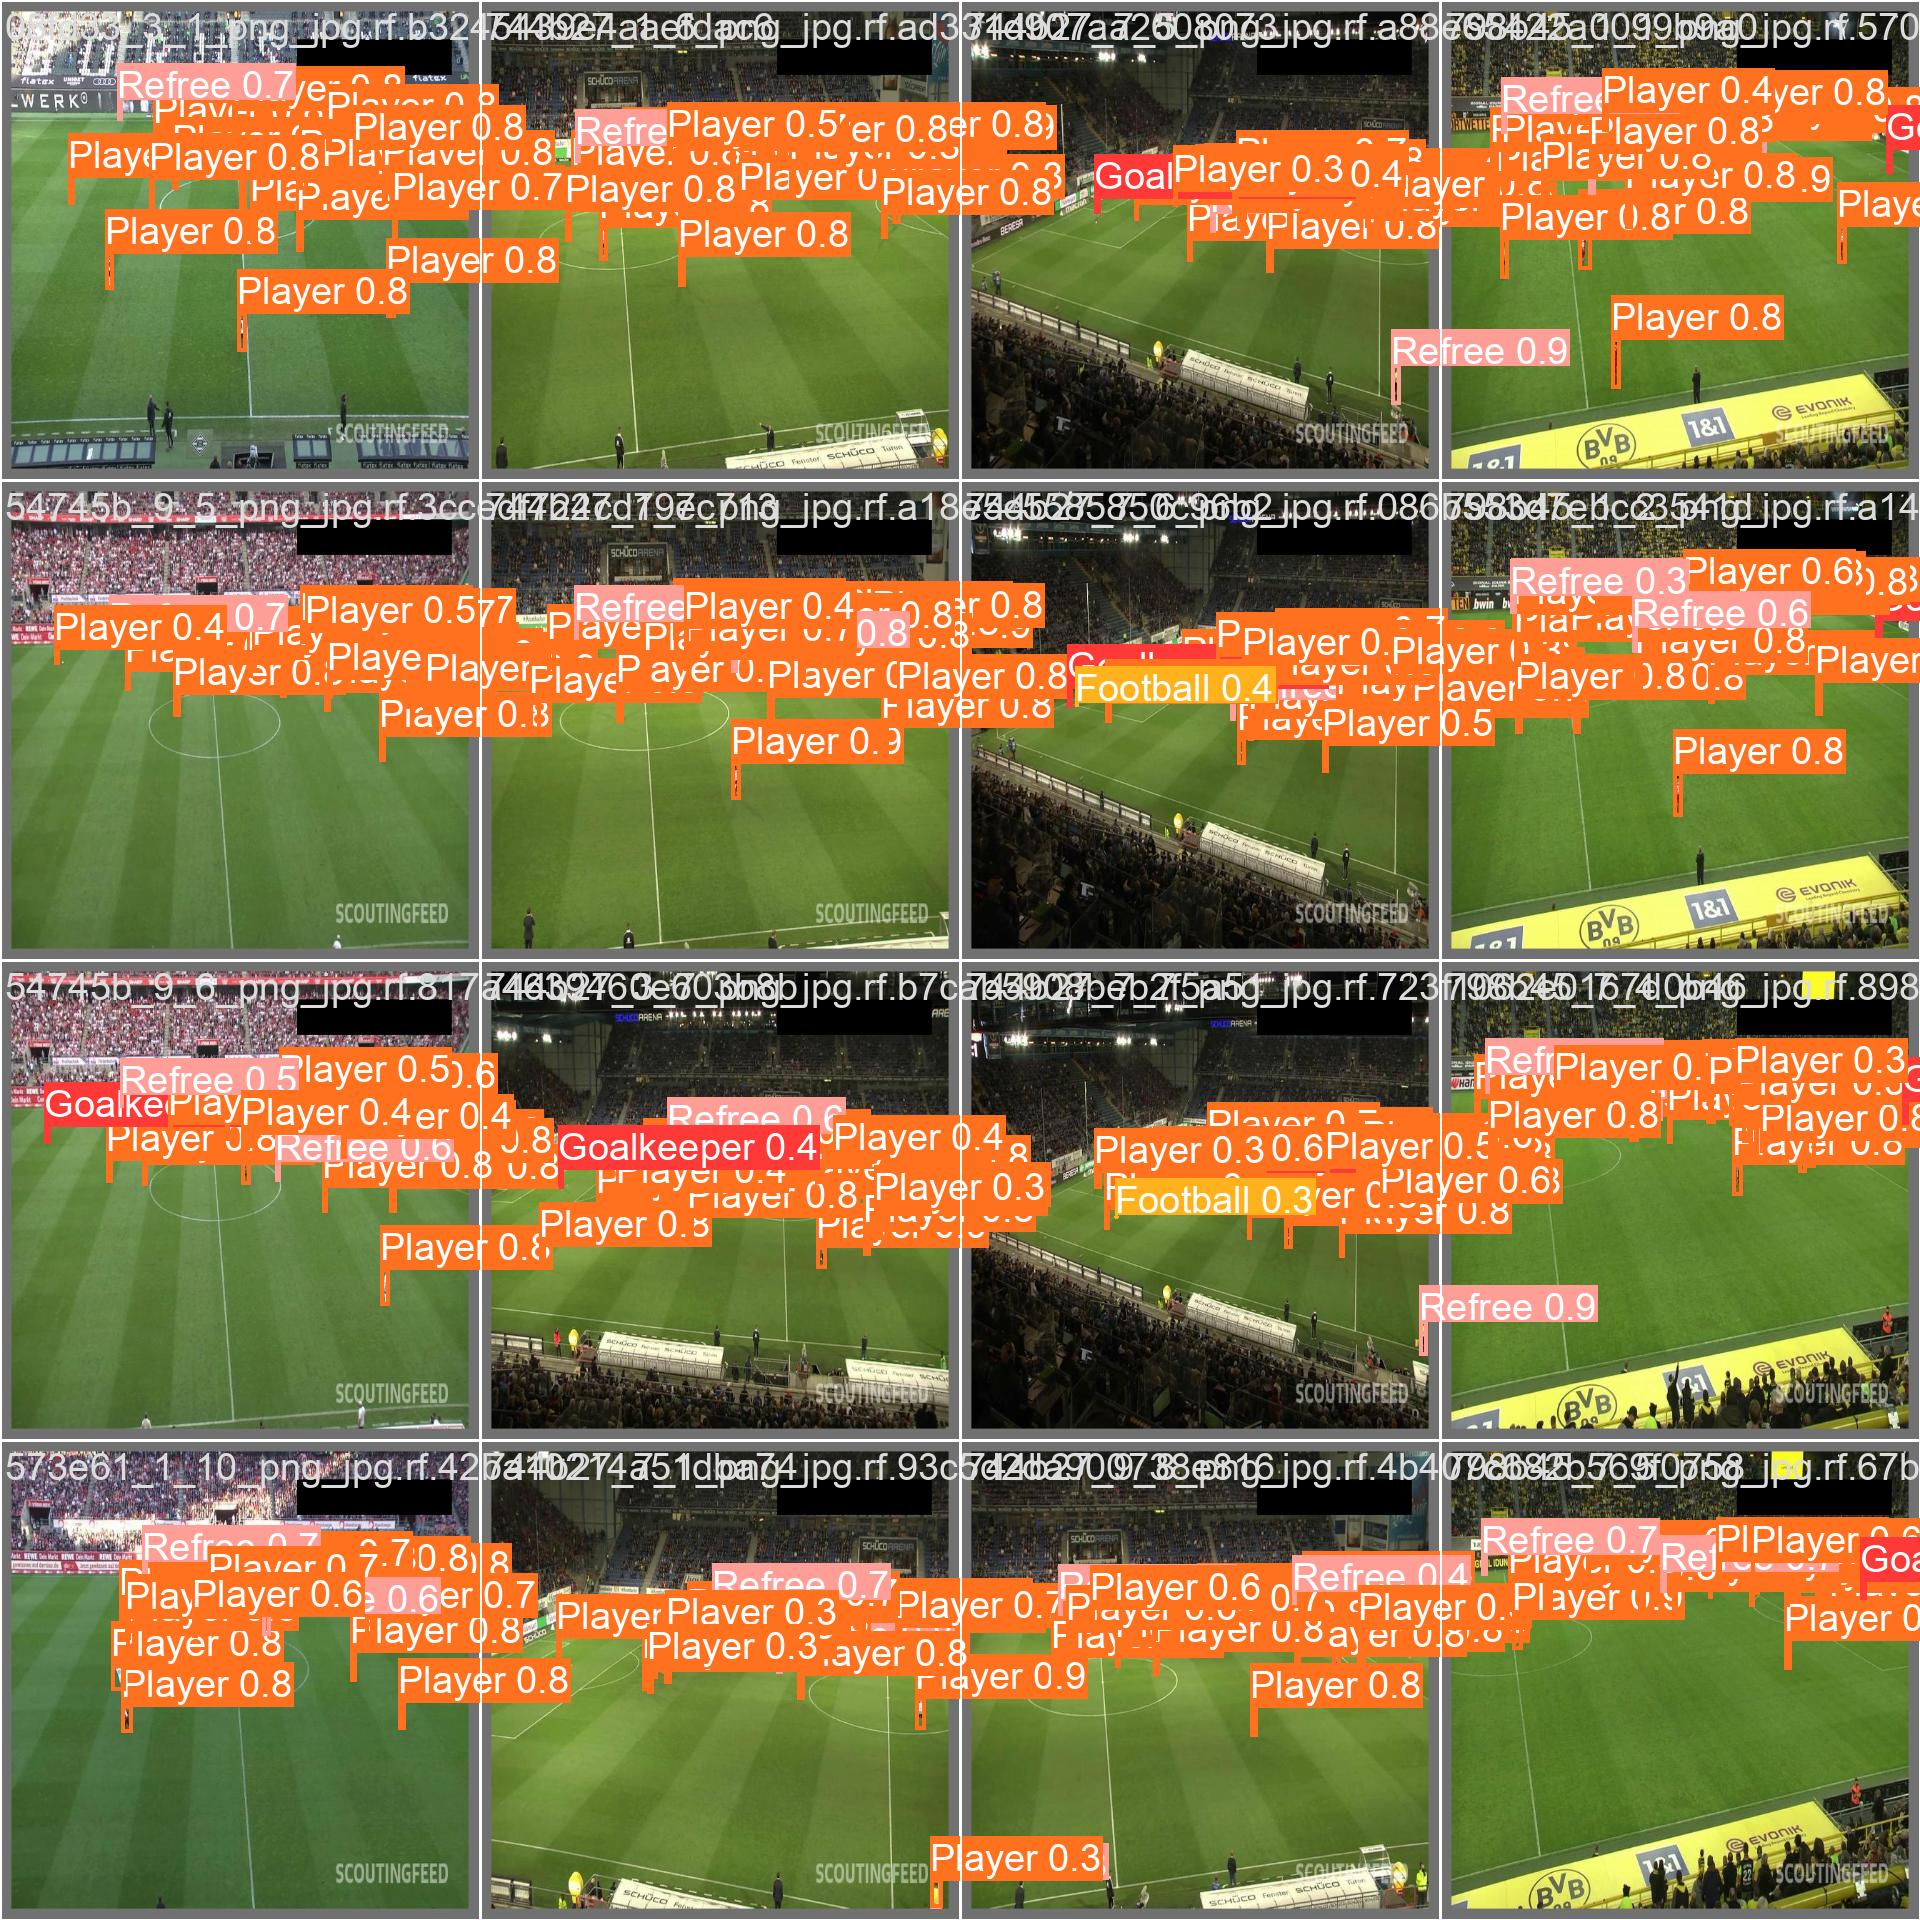</li>
    </ol>
</li>
<li><h3>Validation with the new model -</h3>

![Screenshot 2024-02-06 124647.png](./8.png)</li>
</ul>



<h2>V. Conclusion</h2>

YOLOv8 is the latest release in the family of YOLO models, defining a new state-of-the-art in object detection. When benchmarked on Roboflow 100, we saw a significant performance boost between v8 and v5.

The YOLOv8 software is designed to be as intuitive as possible for developers to use. With a new Ultralytics YOLOv8 pip package, using the model in your code has never been easier. There is also a new command line interface that makes training more intuitive, too.

Now you have all you need to start training YOLOv8 models. Happy building!

<hr/>